# LOAN_PRACTICE_SET [PREDICTIVE ANALYSIS, MODELING,EDA]

In [74]:
print('om namah shivya !'.upper())
print('loan_practice_set [predictive analysis, modeling,EDA]'.upper())

OM NAMAH SHIVYA !
LOAN_PRACTICE_SET [PREDICTIVE ANALYSIS, MODELING,EDA]


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\sdplm\Downloads\loan_prediction.csv", delimiter = ',',usecols = None,index_col = None,
                skiprows = 0,skipfooter = 0)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.isnull().sum()/df.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(480, 13)

In [80]:
df.duplicated().sum()

0

In [9]:
df['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [10]:
Gen = df.groupby(['Gender'], as_index = False)['Loan_ID'].count()
Gen.rename(columns = {'Loan_ID':'COUNT'},inplace = True)
Gen

,Gender,COUNT
0,Female,86
1,Male,394


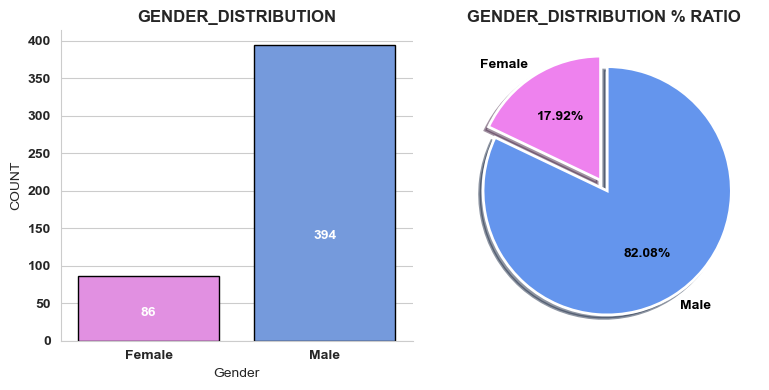

In [11]:
plt.figure(figsize = (8,4))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
bars = sns.barplot(data = Gen,x = 'Gender',y = 'COUNT',palette = ['violet','cornflowerblue'],edgecolor = 'black')

for i in bars.patches:
    height = i.get_height()
    x = i.get_x()+i.get_width()/2
    plt.text(x,height/3,int(height),va = 'bottom',ha = 'center',color ='white',fontweight = 'bold')
    
plt.xticks(weight= 'bold') 
plt.yticks(weight = 'bold')
plt.title('gender_distribution'.upper(),weight = 'bold')


plt.subplot(1,2,2)
plt.pie(x = Gen['COUNT'],explode = [0.05]*len(Gen['Gender'].unique()),shadow = True,
        labels = Gen['Gender'],autopct = '%1.2f%%',colors = ['violet','cornflowerblue'],startangle = 90,
        textprops = {'fontweight':'bold','color':'black'}, wedgeprops = {'linewidth':2,'edgecolor' : 'white'})
plt.title('GENDER_DISTRIBUTION % RATIO',weight= 'bold')




sns.despine()
plt.tight_layout()
plt.show()

In [12]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [13]:
df['Married'] = df['Married'].map({'Yes':'married'.upper(),'No':'unmarried'.upper()})

In [14]:
df['Married'].value_counts()

Married
MARRIED      311
UNMARRIED    169
Name: count, dtype: int64

In [15]:
df['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

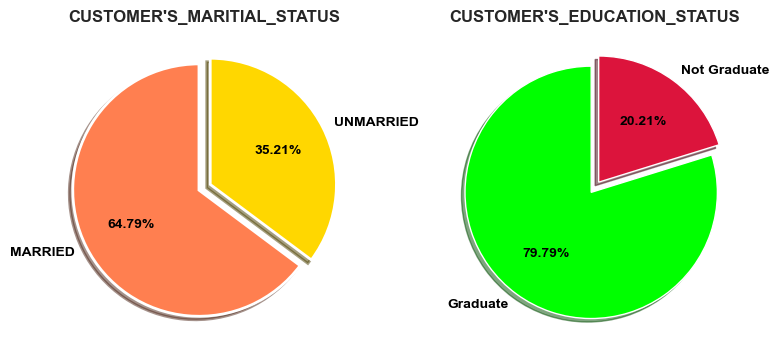

In [16]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)


plt.pie(df['Married'].value_counts().values,labels = df['Married'].value_counts().index,
       explode = [0.05]*len(df['Married'].value_counts().index.unique()), autopct = '%1.2f%%',
        colors = ['coral','gold'],shadow= True,
       startangle = 90,textprops = {'fontweight':'bold',
                                   'color':'black'},
       wedgeprops = {'linewidth':2,
                    'edgecolor':'white'})
plt.title("customer's_maritial_status".upper(),weight = 'bold')

plt.subplot(1,2,2)
plt.pie(df['Education'].value_counts().values,labels = df['Education'].value_counts().index,
       explode = [0.05]*len(df['Education'].value_counts().index.unique()), autopct = '%1.2f%%',
        colors = ['lime','crimson'],shadow= True,
       startangle = 90,textprops = {'fontweight':'bold',
                                   'color':'black'},
       wedgeprops = {'linewidth':1,
                    'edgecolor':'white'})
plt.title("customer's_education_status".upper(),weight = 'bold')

plt.tight_layout()
plt.show()

In [17]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,MARRIED,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,MARRIED,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


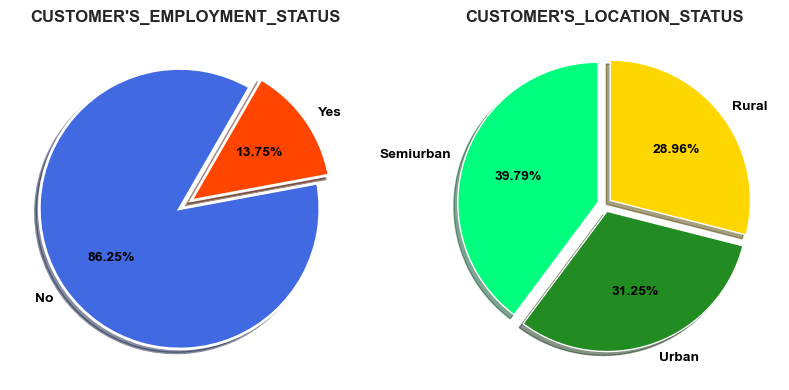

In [18]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)


plt.pie(df['Self_Employed'].value_counts().values,labels = df['Self_Employed'].value_counts().index,
       explode = [0.05]*len(df['Self_Employed'].value_counts().index.unique()), autopct = '%1.2f%%',
        colors = ['royalblue','orangered'],shadow= True,
       startangle = 60,textprops = {'fontweight':'bold',
                                   'color':'black'},
       wedgeprops = {'linewidth':2,
                    'edgecolor':'white'})
plt.title("customer's_employment_status".upper(),weight = 'bold')

plt.subplot(1,2,2)
plt.pie(df['Property_Area'].value_counts().values,labels = df['Property_Area'].value_counts().index,
       explode = [0.05]*len(df['Property_Area'].value_counts().index.unique()), autopct = '%1.2f%%',
        colors = ['springgreen','forestgreen','gold'],shadow= True,
       startangle = 90,textprops = {'fontweight':'bold',
                                   'color':'black'},
       wedgeprops = {'linewidth':1,
                    'edgecolor':'white'})
plt.title("customer's_location_status".upper(),weight = 'bold')

plt.tight_layout()
plt.show()

In [19]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,MARRIED,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,MARRIED,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [20]:
scenario = df.groupby(['Gender','Married','Education','Self_Employed','Loan_Status'],as_index = False)['Loan_ID'].count()
scenario.rename(columns={'Loan_ID':'COUNT'},inplace  = True)
scenario

,Gender,Married,Education,Self_Employed,Loan_Status,COUNT
0,Female,MARRIED,Graduate,No,N,5
1,Female,MARRIED,Graduate,No,Y,14
2,Female,MARRIED,Graduate,Yes,N,2
3,Female,MARRIED,Graduate,Yes,Y,1
4,Female,MARRIED,Not Graduate,No,N,1
5,Female,MARRIED,Not Graduate,No,Y,1
6,Female,MARRIED,Not Graduate,Yes,Y,1
7,Female,UNMARRIED,Graduate,No,N,18
8,Female,UNMARRIED,Graduate,No,Y,28
9,Female,UNMARRIED,Graduate,Yes,N,3


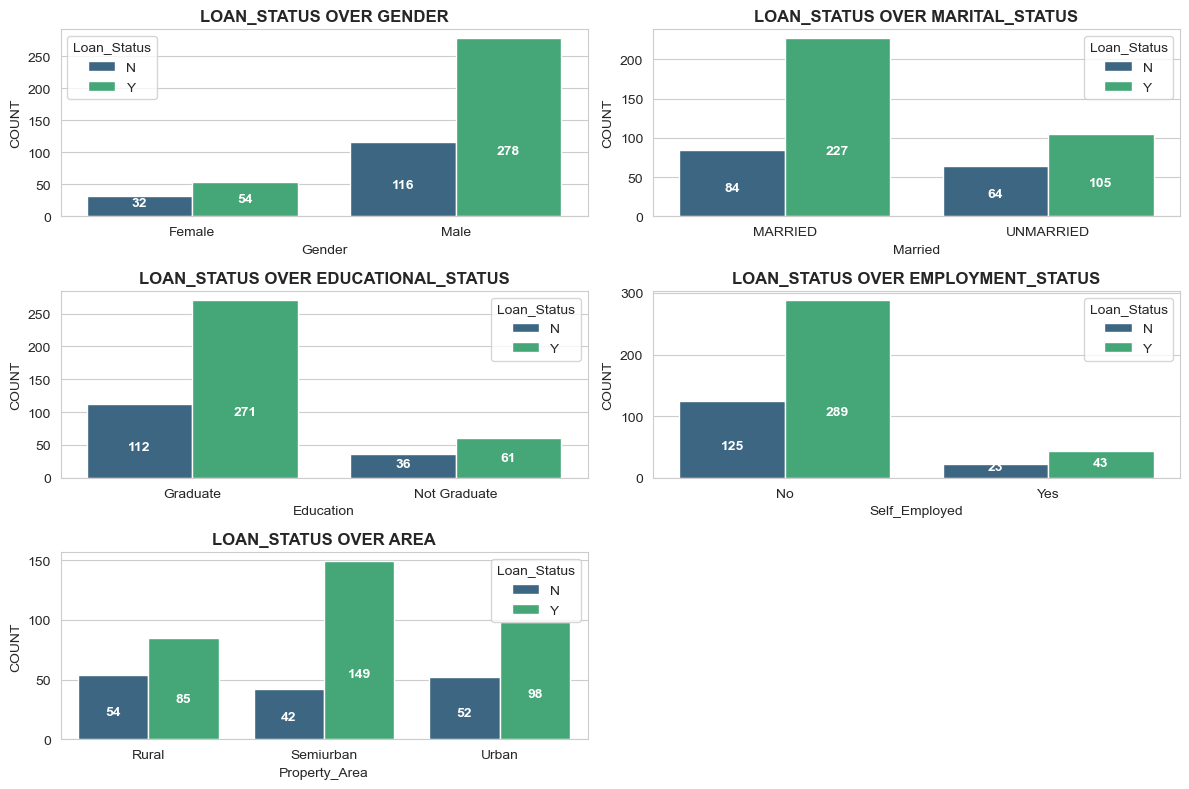

In [21]:
l_stat = df.groupby(['Gender','Loan_Status'],as_index = False)['Loan_ID'].count()
l_stat.rename(columns = {'Loan_ID':'COUNT'}, inplace = True)
l_stat

l_stat1 = df.groupby(['Married','Loan_Status'],as_index = False)['Loan_ID'].count()
l_stat1.rename(columns = {'Loan_ID':'COUNT'}, inplace = True)
l_stat1

l_stat2 = df.groupby(['Education','Loan_Status'],as_index = False)['Loan_ID'].count()
l_stat2.rename(columns = {'Loan_ID':'COUNT'}, inplace = True)
l_stat2

l_stat3 = df.groupby(['Self_Employed','Loan_Status'],as_index = False)['Loan_ID'].count()
l_stat3.rename(columns = {'Loan_ID':'COUNT'}, inplace = True)
l_stat3

l_stat4 = df.groupby(['Property_Area','Loan_Status'],as_index = False)['Loan_ID'].count()
l_stat4.rename(columns = {'Loan_ID':'COUNT'}, inplace = True)
l_stat4

plt.figure(figsize =(12,8))
sns.set_style('whitegrid')

plt.subplot(3,2,1)
bars =sns.barplot(data = l_stat,x = 'Gender',y= 'COUNT',hue = 'Loan_Status',palette = 'viridis')

for i in bars.patches:
    height = i.get_height()
    x = i.get_x()+i.get_width()/2
    plt.text(x,height/3,int(height),va = 'bottom',ha = 'center',color ='white',fontweight = 'bold')
    
    
plt.title('loan_status over gender'.upper(),weight = 'bold')
    
plt.subplot(3,2,2)    
bars =sns.barplot(data = l_stat1,x = 'Married',y= 'COUNT',hue = 'Loan_Status',palette = 'viridis')

for i in bars.patches:
    height = i.get_height()
    x = i.get_x()+i.get_width()/2
    plt.text(x,height/3,int(height),va = 'bottom',ha = 'center',color ='white',fontweight = 'bold')
    
plt.title('loan_status over marital_status'.upper(),weight = 'bold')
       
plt.subplot(3,2,3)    
bars =sns.barplot(data = l_stat2,x = 'Education',y= 'COUNT',hue = 'Loan_Status',palette = 'viridis')

for i in bars.patches:
    height = i.get_height()
    x = i.get_x()+i.get_width()/2
    plt.text(x,height/3,int(height),va = 'bottom',ha = 'center',color ='white',fontweight = 'bold')
    
plt.title('loan_status over educational_status'.upper(),weight = 'bold')
        
    
plt.subplot(3,2,4)    
bars =sns.barplot(data = l_stat3,x = 'Self_Employed',y= 'COUNT',hue = 'Loan_Status',palette = 'viridis')

for i in bars.patches:
    height = i.get_height()
    x = i.get_x()+i.get_width()/2
    plt.text(x,height/3,int(height),va = 'bottom',ha = 'center',color ='white',fontweight = 'bold')
    
plt.title('loan_status over employment_status'.upper(),weight = 'bold')
       
    
plt.subplot(3,2,5)    
bars =sns.barplot(data = l_stat4,x = 'Property_Area',y= 'COUNT',hue = 'Loan_Status',palette = 'viridis')

for i in bars.patches:
    height = i.get_height()
    x = i.get_x()+i.get_width()/2
    plt.text(x,height/3,int(height),va = 'bottom',ha = 'center',color ='white',fontweight = 'bold')
    
plt.title('loan_status over area'.upper(),weight = 'bold')
        
    
plt.tight_layout()    

plt.show()

In [22]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,MARRIED,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,MARRIED,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [23]:
def unique(x):
    return x.unique()
unique(df['Loan_Status'])

array(['N', 'Y'], dtype=object)

In [24]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Married'] = df['Married'].map({'MARRIED':1,'UNMARRIED':0})

In [25]:
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'] .map({'No':0,'Yes':1})
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2})
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1})

In [26]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1


# preprocessing 

In [27]:
unique(df['Dependents'])

array(['1', '0', '2', '3+'], dtype=object)

In [28]:
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].astype(np.int64)
unique(df['Dependents'])

array([1, 0, 2, 3], dtype=int64)

In [29]:
df1 = df.copy()
df1.drop(columns = 'Loan_ID',inplace = True)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [30]:
corr = df1.corr(method = 'pearson')
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,-0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.097035,0.064504
Married,0.349424,1.000000,0.386367,-0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.028167,0.112321
Dependents,0.217510,0.386367,1.000000,-0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,-0.030838,0.035428
Education,-0.059245,-0.001652,-0.028608,1.000000,0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.060010,0.068437
Self_Employed,-0.002761,0.015674,0.045754,0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.037900,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.024586,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.000318,0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.004348,-0.049020
LoanAmount,0.098975,0.183442,0.172780,0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.039807,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.000568,-0.007798
Credit_History,0.022447,0.029095,-0.026651,0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.040092,0.529390


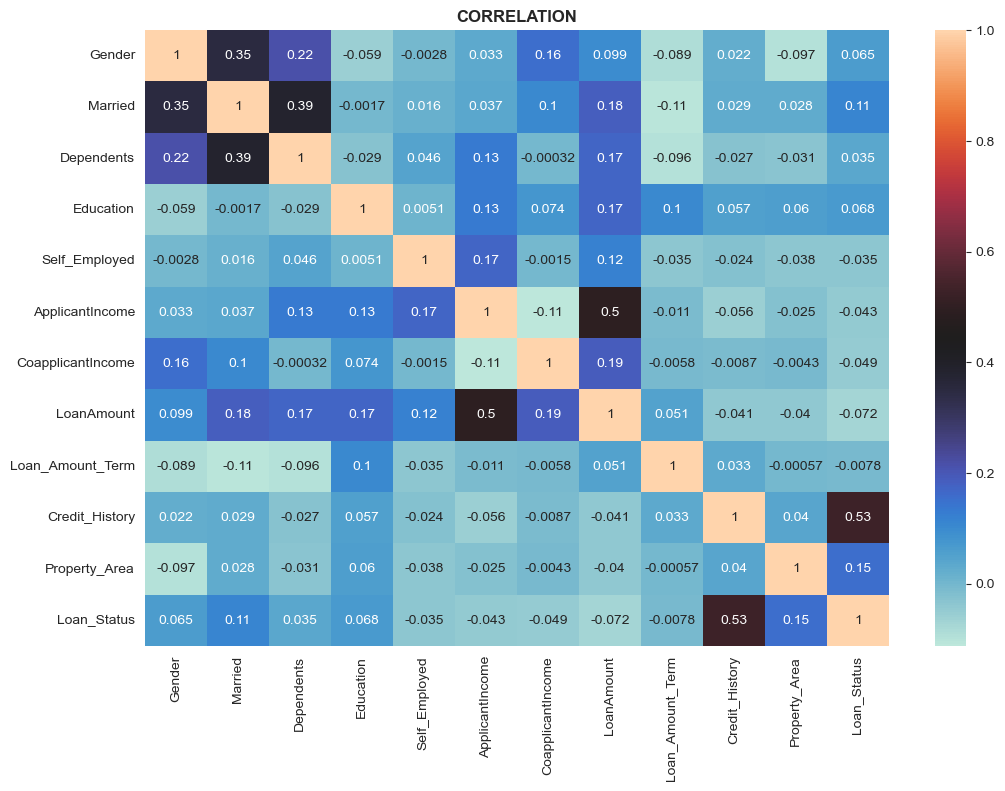

In [76]:
plt.figure(figsize = (12,8))
sns.heatmap(data =corr, annot = True,cmap = 'icefire' )
plt.title('correlation'.upper(),weight = 'bold')

plt.show()

In [32]:
df1.skew()

Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education           -1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.203263
Loan_Status         -0.832681
dtype: float64

# no sufficient need to  fix skewness according to relationship with target variable and skewnwss of data.


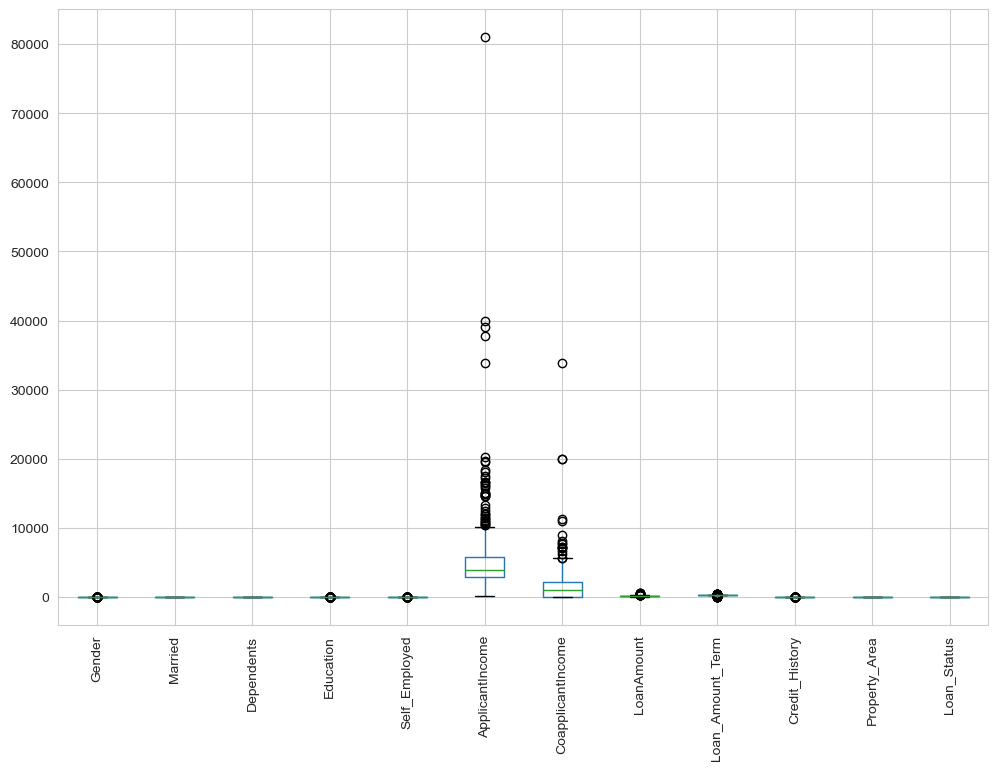

In [34]:
plt.figure(figsize = (12,8))
df1.boxplot()

plt.xticks(rotation = 90)
plt.show()

# no outlier treatment required

In [36]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


# model_selection

In [37]:
x = df1.drop(columns = 'Loan_Status')
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [40]:
y = df1[['Loan_Status']]
y

,Loan_Status
1,0
2,1
3,1
4,1
5,1
...,...
609,1
610,1
611,1
612,1


In [43]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y, random_state = 45, test_size = 0.3)


In [44]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
598,1,1,0,1,1,9963,0.0,180.0,360.0,1.0,0
239,1,1,1,1,0,3315,0.0,96.0,360.0,1.0,2
599,1,1,2,1,0,5780,0.0,192.0,360.0,1.0,1
373,1,0,1,1,0,3062,1987.0,111.0,180.0,0.0,1
245,1,0,0,1,1,6050,4333.0,120.0,180.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
43,1,1,0,1,0,3941,2336.0,134.0,360.0,1.0,2
487,1,1,1,1,0,18333,0.0,500.0,360.0,1.0,1
169,1,1,2,1,0,8000,0.0,200.0,360.0,1.0,2
529,1,0,0,0,0,6783,0.0,130.0,360.0,1.0,2


# normalization

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
x_train_sc= scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [52]:
from sklearn.utils.validation import column_or_1d
y_train = column_or_1d(y_train)
y_test = column_or_1d(y_test)

# logistic_regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [54]:
lr.fit(x_train_sc,y_train)
lr.fit(x_test_sc,y_test)

LogisticRegression()

In [56]:
y_pred_train = lr.predict(x_train_sc)
y_pred_test = lr.predict(x_test_sc)

In [57]:
df2 = pd.DataFrame()
df2['actual'] = y_train
df2['predicted'] = y_pred_train
df2

,actual,predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,1
...,...,...
331,1,1
332,0,1
333,1,1
334,1,1


In [58]:
df3 = pd.DataFrame()
df3['actual'] = y_test
df3['predicted'] = y_pred_test
df3

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
139,0,1
140,0,1
141,1,1
142,0,1


# accuracy_score

In [62]:
from sklearn import metrics
acc1 = (metrics.accuracy_score (y_train, y_pred_train)*100).round(2)
print(acc1)
acc2 = (metrics.accuracy_score(y_test,y_pred_test)*100).round(2)
print(acc2)


79.46
81.25


# classification_report

In [64]:
from sklearn.metrics import classification_report
cr_report1 = classification_report(y_train,y_pred_train,target_names = ['YES','NO'])
print(cr_report1)
cr_report2 = classification_report(y_test,y_pred_test,target_names = ['YES','NO'])
print(cr_report2)

              precision    recall  f1-score   support

         YES       0.82      0.44      0.58       106
          NO       0.79      0.96      0.86       230

    accuracy                           0.79       336
   macro avg       0.81      0.70      0.72       336
weighted avg       0.80      0.79      0.77       336

              precision    recall  f1-score   support

         YES       0.83      0.45      0.58        42
          NO       0.81      0.96      0.88       102

    accuracy                           0.81       144
   macro avg       0.82      0.71      0.73       144
weighted avg       0.81      0.81      0.79       144



In [67]:
from sklearn.metrics import classification_report
cr_report1 = classification_report(y_train,y_pred_train,target_names = ['1','0'])
print(cr_report1)
cr_report2 = classification_report(y_test,y_pred_test,target_names = ['0','1'])
print(cr_report2)

              precision    recall  f1-score   support

           1       0.82      0.44      0.58       106
           0       0.79      0.96      0.86       230

    accuracy                           0.79       336
   macro avg       0.81      0.70      0.72       336
weighted avg       0.80      0.79      0.77       336

              precision    recall  f1-score   support

           0       0.83      0.45      0.58        42
           1       0.81      0.96      0.88       102

    accuracy                           0.81       144
   macro avg       0.82      0.71      0.73       144
weighted avg       0.81      0.81      0.79       144



# confusion_matrix

In [68]:
cm_1 = metrics.confusion_matrix(y_train,y_pred_train)
cm_2 = metrics.confusion_matrix(y_test,y_pred_test)
cm_df1 = pd.DataFrame(cm_1,columns = [0,1],index = [0,1])
cm_df2 = pd.DataFrame(cm_2,columns = [0,1],index = [0,1])
print(cm_df1)
print(cm_df2)

    0    1
0  47   59
1  10  220
    0   1
0  19  23
1   4  98


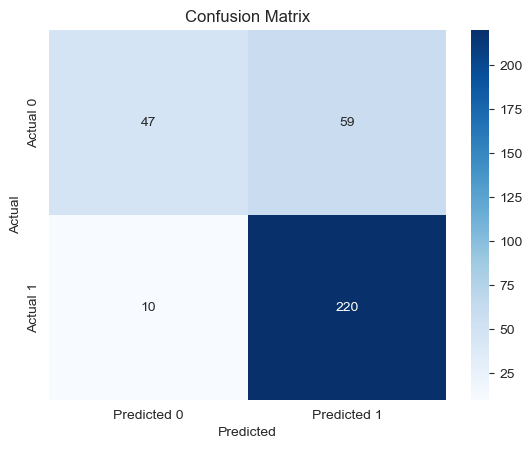

In [70]:
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

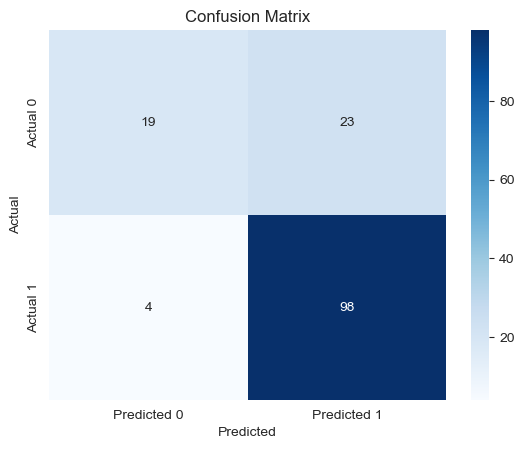

In [71]:
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()